In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from cascade_driver import CascadeDriver
cas_driver = CascadeDriver(zenith_angle = 30)

MCEqRun::set_interaction_model(): DPMJETIII191
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
 +-----------------------------------------------------------------------+
 |                                                                       |
 |                       DPMJET-III version 19.1.5                       |
 |                                                                       |
 |                      (Last change:  16 Jan 2023)                      |
 |                                                                       |
 |            Authors:                                                   |
 |                     Stefan Roesler     (CERN)                         |
 |                     Anatoli Fedynitch (ASIoP)                         |
 |                     Ralph Engel        (KIT)                          |
 |                     Johannes Ranft     (Siegen Univ.)           

In [18]:
%autoreload 2

mceq_decaying_pdgs = [111, -211, 211]

# mceq_decaying_pdgs = [-11, 11, -12, 12,
#                       -13, 13, -14, 14, 16, 22,
#                         111, 130, -211, 211, 310,
#                         -321, 321, -2112, 2112, 
#                         -2212, 2212, -3122, 3122]


cas_driver.simulation_parameters(pdg = 2212, energy = 1e2, xdepth = 0,
                                 threshold_energy = 1e-6, stop_height = 5,
                                 accumulate_runs = True, reset_ids = True,
                                 mceq_decaying_pdgs = mceq_decaying_pdgs)

for i in range(1000):
    cas_driver.run()

/hetghome/antonpr/xmax_sigma/cascade_np/cascade_driver.py:172: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  


stop depth = 587.6807608756709
1 Number of inter = 0 number of decays = 0
TEST: 0 MISSING, INIT = 1, FINAL = 1


event.pid = [2212  111 2112  211 -211  111   22   22  111 2212  211 2212 2112 -211
 2212 -211 2112]
event.pid = [ 1.48085721 20.47815735 60.62513878  9.84783009  0.39709373  0.36564679
  2.43263542  0.79601868  0.58160307  3.41683006  0.29801854  1.01289133
  0.99736846  0.53416404  0.9864383   0.26767645  1.03772516],
sum = 105.55609345102319, init = 100.0
event.pid = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
FixedTarget(frame=<EventFrame.FIXED_TARGET: 2>, p1=<PDGID: 2212>, p2=<PDGID: 1000070140>, ecm=13.76755869104803, plab=99.99559813062781, elab=100.0, ekin=99.061727919, beams=(array([  0.        ,   0.        ,  99.99559813, 100.        ]), array([0.        , 0.        , 0.        , 0.93891875])), _gamma_cm=7.331649787164714, _betagamma_cm=7.263132148159801)
Interaction: energy conservation 5.5560934510231865 %

Parent energy = 100.0
Failed energy = 0.0
Children = 105.5560934

In [19]:
from cascade_analysis import CascadeAnalysis

cascade_analysis = CascadeAnalysis(cas_driver)
cascade_analysis.print_stats()

Number of runs = 100
Initial state:
  $p$(2212) with energy = 1.000e+02

Final state:
  Number of all particles in cascade = 10663
  Number of final particles = 10612
  Number of interactions = 380
  Number of decays = 3028
  Max number of generations = 7

  Max xdepth = 1167.374918379408
  Exectution time = 1.38 s
  Exectution time per run = 0.01 s
  Size of cascade_driver object = 40.29 Mb

Energy conservation in cascade:
  Initial energy = 1.00000e+02 GeV
  Energy in final particles = 1.67714e+02 GeV
  Relative loss(+)/gain(-) -6.771e-01
Final ids = [   0 1172 1173 1175 1177 1179 1185 1191 1192 1930 1936 1938 1940 1942
 1944 1946 2822 2823 2824 2825 2826 3552 3554 3555 3556 3557 3560 3738
 5197 5198 5200 5201 7154 7155 7156 7157] have counts
 [2854    2    2    2    2    2    2    2    2    7    7    7    7    7
    7    7    2    2    2    2    2   11   11   11  578  578  578   28
    8    8    8    8    2    2    2    2]


/hetghome/antonpr/xmax_sigma/cascade_np/cascade_driver.py:172: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  


{22: 3541, 2212: 1180, 14: 956, -13: 956, -14: 884, 13: 884, 3122: 676, 321: 671, 2112: 631, 310: 69, 130: 47, -321: 24, 211: 18, -211: 17, 11: 17, -11: 17, -2212: 13, -3122: 6, -2112: 5}


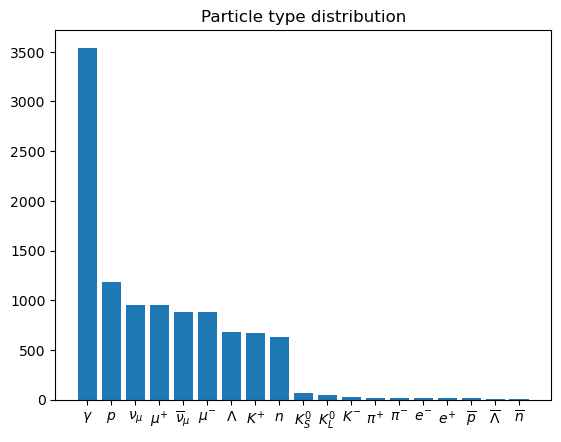

In [20]:
cascade_analysis.plot_ptypes_dist(from_ = 0)

        22 : 0.42820
      2212 : 0.17620
        14 : 0.05955
       -13 : 0.20921
       -14 : 0.04334
        13 : 0.16821
      3122 : 0.15365
       321 : 0.23742
      2112 : 0.10631
       310 : 0.02984
       130 : 0.02437
      -321 : 0.01751
       211 : 0.00603
      -211 : 0.00371
        11 : 0.00144
       -11 : 0.00124
     -2212 : 0.00422
     -3122 : 0.00507
     -2112 : 0.00161
Total energy = 1.6771387703454017


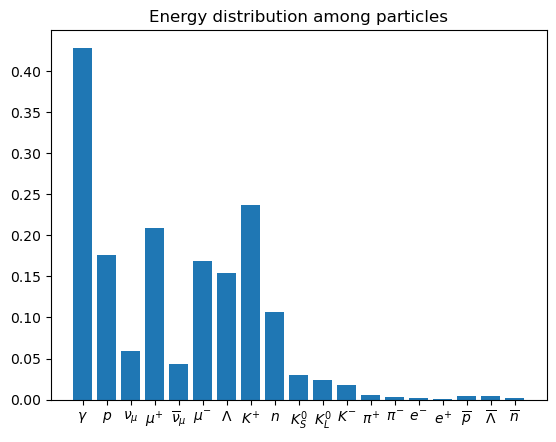

In [21]:
cascade_analysis.plot_ptypes_energy_dist(from_ = 0)

In [ ]:
cascade_analysis.plot_energy(-13)

In [ ]:
cascade_analysis.plot_energy_list(pids = [-13, 13, -14, 14, -11, 11])

In [22]:
from mceq_comparison import GetMCEQDist
import matplotlib.pylab as plt

res_mceq = GetMCEQDist()

MCEqRun::set_interaction_model(): DPMJETIII191
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
[493]


Muon mass = 0.1056583745, 0.1056583745


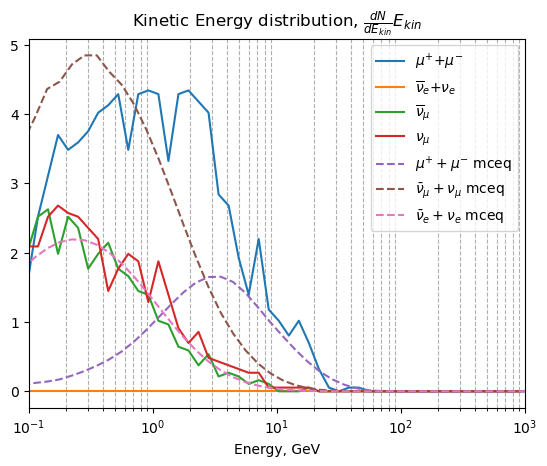

In [25]:
cascade_analysis.plot_energy_kin_dist(pids = [(-13, 13), (-12, 12), (-14,), (14,)], 
                                      per_run=True,
                                      xrange = (0.9e-1, 1e3),
                                      nbins=50)

plt.semilogx(res_mceq.mu_spec[0], res_mceq.mu_spec[1], label = res_mceq.mu_spec[2], linestyle='--')
plt.semilogx(res_mceq.numu_spec[0], res_mceq.numu_spec[1], label = res_mceq.numu_spec[2], linestyle='--')
plt.semilogx(res_mceq.nue_spec[0], res_mceq.nue_spec[1], label = res_mceq.nue_spec[2], linestyle='--')

plt.xlim(1e-1, 1e3)
plt.grid()
plt.grid(visible=True, which='minor', linestyle='--')
plt.legend()
# plt.ylim(1e-7, 1e3) 

In [ ]:
cascade_analysis.plot_xdepth_list(nbins = 100, pids = [-14, 14, 2212, -13, 13], 
                                  xrange = (0, 1012), per_run = True)

In [ ]:
cascade_analysis.plot_xdepth_stop(nbins = 100, pids = [-14, 14, 2212, -13, 13, 22], #pids = None, 
                                  all_pids = True, 
                                  xrange = (0, 500), per_run = False)

In [ ]:
cascade_analysis.plot_height_list(pids = [22, -13, 13, -11, 11], all_pids=True)

In [ ]:
cascade_analysis.digitize()

In [ ]:
import matplotlib.pylab as plt
plt.semilogx(cascade_analysis.egrid, cascade_analysis.hist_dict[22][0][99])



len(cascade_analysis.hist_dict[22][0])